In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *

Using TensorFlow backend.


Initialized TensorFlow


### Steps:
1. Train $M$ networks for each dropout on training $p\in[0,1]$
2. Get mean MAE on test/train for crash/nocrash. How does it behave? **This part can be taken from some paper!**
3. Get v1, v2, v3, v4 for each of the networks
4. Compute the rank loss if the networks were ordered by these bounds

In [116]:
# network configuration
N = [100, 50]

def get_p_arr(p):
    """ p array with failure on the first layer """
    return [0, p]  + [0] * len(N)

# prob. of failure at inference
p_inference = get_p_arr(0.05)

# prob. of failure at train
p_train = get_p_arr(0.00)

# Lips. coeff
KLips = 1.

# activation function
activation = 'sigmoid'

# number of repeats for error estimation
repetitions = 2000

In [123]:
# obtaining the distribution after 10 epochs
results1 = []

In [124]:
for _ in tqdm(range(10)):
    # for some reason, running regression results in lower accuracy with dropout at inference than without
    exp = BostonHousingExperiment(N = N, p_inference = p_inference, p_train = p_train, KLips = KLips, epochs = 10,
                                  activation = activation, reg_type = None, reg_coeff = 0, do_print = False,
                                  name = 'experiment_dropout_first', seed = None, batch_size = 10000)
    results1 += [np.mean(exp.get_bound_v3(exp.x_train)['std'] ** 2)]
    #results1 += [{'correct': exp.get_mae_correct(),
    #'crashing': exp.get_mae_crash(repetitions = repetitions)}]


100%|██████████| 10/10 [01:31<00:00,  9.34s/it]


0.018648542 0.017702142


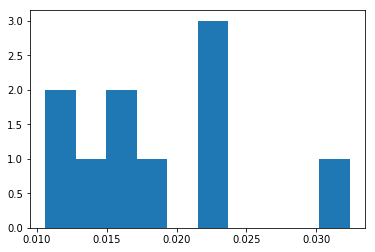

In [136]:
plt.hist(results1)
print(np.mean(results1), np.median(results1))
plt.show()

In [132]:
# prob. of failure at train
p_train = get_p_arr(0.05)
results2 = []

In [134]:
for _ in tqdm(range(10)):
    # for some reason, running regression results in lower accuracy with dropout at inference than without
    exp = BostonHousingExperiment(N = N, p_inference = p_inference, p_train = p_train, KLips = KLips, epochs = 10,
                                  activation = activation, reg_type = None, reg_coeff = 0, do_print = False,
                                  name = 'experiment_dropout_first', seed = None, batch_size = 10000)
    results2 += [np.mean(exp.get_bound_v3(exp.x_train)['std'] ** 2)]
    #results2 += [{'correct': exp.get_mae_correct(),
    #'crashing': exp.get_mae_crash(repetitions = repetitions)}]



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:09<01:26,  9.58s/it]

 20%|██        | 2/10 [00:19<01:17,  9.73s/it]

 30%|███       | 3/10 [00:29<01:08,  9.78s/it]

 40%|████      | 4/10 [00:39<00:59,  9.88s/it]

 50%|█████     | 5/10 [00:49<00:49, 10.00s/it]

 60%|██████    | 6/10 [01:00<00:40, 10.03s/it]

 70%|███████   | 7/10 [01:10<00:30, 10.24s/it]

 80%|████████  | 8/10 [01:21<00:20, 10.29s/it]

 90%|█████████ | 9/10 [01:31<00:10, 10.34s/it]

100%|██████████| 10/10 [01:42<00:00, 10.36s/it]



0.017030794 0.014633126


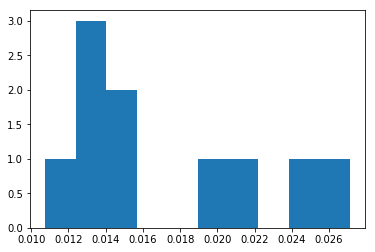

In [138]:
plt.hist(results2)
print(np.mean(results2), np.median(results2))
plt.show()

In [114]:
keyval = [(key+' '+key1, val1) for d in results2 for key, val in d.items() for key1, val1 in val.items()]
keyval = {key: [x[1] for x in keyval if x[0] == key] for key in set([x[0] for x in keyval])}

correct test 20.327742556841933
correct train 19.655879041456647
crashing test 20.50601555531738
crashing train 19.833659149689176


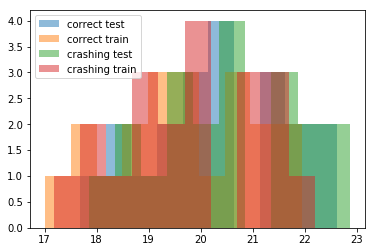

In [115]:
for key, val in keyval.items():
    plt.hist(val, label = key, alpha = 0.5)
plt.legend()
for key, val in keyval.items():
    print(key, np.mean(val))

In [109]:
keyval = [(key+' '+key1, val1) for d in results1 for key, val in d.items() for key1, val1 in val.items()]
keyval = {key: [x[1] for x in keyval if x[0] == key] for key in set([x[0] for x in keyval])}

correct test 19.3787531110469
correct train 18.69920689306342
crashing test 19.56062218259532
crashing train 18.88076041454707
